In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, log_loss
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.compose import ColumnTransformer
#from sklearn.model_selection import GridSearchCV


In [67]:
dataset = pd.read_csv('loan_prediction.csv')

In [68]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
dataset.shape

(614, 13)

In [70]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [71]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [72]:
# null values in each columns in percent
dataset.isnull().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [73]:
# we manually fill missing values for purpose of data vis.
dataset['Gender'] = dataset['Gender'].fillna('Male')
dataset['Married'] = dataset['Married'].fillna('Yes')
dataset['Dependents'] = dataset['Dependents'].str.strip('+').astype('float64')
dataset["Dependents"] = dataset["Dependents"].fillna(value=dataset["Dependents"].median())
dataset['Self_Employed'] = dataset['Self_Employed'].fillna('No')
dataset["LoanAmount"] = dataset["LoanAmount"].fillna(value=dataset["LoanAmount"].mean())
dataset["Loan_Amount_Term"] = dataset["Loan_Amount_Term"].fillna(value=dataset["Loan_Amount_Term"].mean())
dataset["Credit_History"] = dataset["Credit_History"].fillna(value=dataset["Credit_History"].median())

In [74]:
# Checking whether we have any null value, as you see there is no null value 
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [65]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [7]:
x = dataset.drop('Loan_Status', axis=1)
y = dataset['Loan_Status']

In [9]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
num_features = train.select_dtypes(include=['int64', 'float64']).columns
cat_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns


preprocessing = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
    
])

In [11]:
classifiers = [KNeighborsClassifier(),
               SVC(),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor',preprocessing),
                           ('classifier', classifier)
                          ])
    pipe.fit(x_train, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(x_test, y_test))


    

KNeighborsClassifier()
model score: 0.811
SVC()
model score: 0.816
DecisionTreeClassifier()
model score: 0.741
RandomForestClassifier()
model score: 0.795


In [12]:
model=Pipeline(steps=[
    ('preprop', preprocessing),
    ('classifier', SVC())
])

param_grid = {'classifier__degree': [3,4,5],
              'classifier__C': [1,5,10]
             }

gscv = GridSearchCV(model,param_grid,n_jobs=1 )
gscv.fit(x_train, y_train)
print(gscv.best_params_)
print(gscv.best_score_)

{'classifier__C': 1, 'classifier__degree': 3}
0.7949110807113543


In [11]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# ******************************* WITHOUT PIPELINE

In [ ]:
# ******************************* WITHOUT PIPELINE

In [ ]:
# ******************************* WITHOUT PIPELINE

In [5]:
test = pd.read_csv('test.csv')


In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [13]:
test.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [3]:
#x['Loan_ID'] = x['Loan_ID'].apply(lambda x: x.replace('LP', ''))
x.drop('Loan_ID', axis=1, inplace=True)

In [9]:
x['Gender'] = x['Gender'].fillna(x['Gender'].mode()[0])

In [15]:
x['Married'] = x['Married'].fillna(x['Married'].mode()[0])
x['Dependents'] = x['Dependents'].fillna(x['Dependents'].mode()[0])
x['Self_Employed'] = x['Self_Employed'].fillna(x['Self_Employed'].mode()[0])


IndexError: invalid index to scalar variable.

In [17]:
lamean = x['LoanAmount'].mean()
latmean = x['Loan_Amount_Term'].mean()
x['LoanAmount'] = x['LoanAmount'].fillna(lamean)
x['Loan_Amount_Term'] = x['Loan_Amount_Term'].fillna(latmean)
x['Credit_History'] = x['Credit_History'].fillna(1.0)


In [18]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
x.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
cols = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    x[col] = le.fit_transform(x[col])

In [21]:
x.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [22]:
x.shape

(614, 12)

In [23]:
x['Married'].unique()

array([0, 1, 2])

In [13]:
x['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

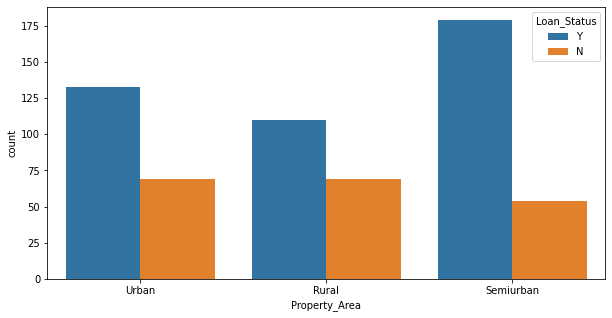

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=x, x='Property_Area', hue='Loan_Status')

In [ ]:
# aditional codes

In [23]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
